In [24]:
import pandas as pd # the pd is by convention
import numpy as np # as is the np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import pickle

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

# Importing Loans

In [2]:
loan_df = pd.read_csv("loan.csv", low_memory=False)

In [3]:
Dictionary_df = pd.read_excel("LCDataDictionary.xlsx")

# Checking Dictionary Definition Keys with Loan Data Set

Found a Dictionary definition of the Loans from LoanClub, so I would like to find the name in my Loan Set in the Dictionary Defintion

#### **Comparing Variables Names:**

In [6]:
# Loan_cvs column names not in Dictionary so I can't get a proper definition to interpret data.
# Variables in loans_df not in Dictionary.xsls

diff_list = np.setdiff1d(loan_df.columns.values.tolist(), list(Dictionary_df["LoanStatNew"]))
diff_list

array(['total_cu_tl', 'total_rev_hi_lim', 'verification_status',
       'verification_status_joint'], dtype='<U27')

In [7]:
# Dictionary names not in Loan_CVS
# Variables in Dictionary.xsls not in loans_df 

diff_list = np.setdiff1d(list(Dictionary_df["LoanStatNew"]),loan_df.columns.values.tolist())
diff_list

array(['total_rev_hi_lim \xa0'], dtype='<U27')

Renaming Dictionary Defintions

In [8]:
Dictionary_df["LoanStatNew"]=Dictionary_df["LoanStatNew"].replace({"total_rev_hi_lim \xa0":"total_rev_hi_lim", "desc":"descrip"})

For any definition that are not present in Dictionary by the loan_df, remove them and save the edited version

In [9]:
# Dictionary_df["LoanStatNew"].drop(columns=['fico_range_high', 'fico_range_low', "is_inc_v", "last_fico_range_high", "last_fico_range_low", "total_rev_hi_lim \xa0", "verified_status_joint"])
for element in diff_list:
    Dictionary_df=Dictionary_df[Dictionary_df["LoanStatNew"]!=element]
# df = df[df.line_race != 0]
Dictionary_df.head(50)
Dictionary_df.to_csv("CleanLCDataDcitionary.csv")

In [14]:
Dictionary_df = pd.read_csv("CleanLCDataDcitionary.csv")
Dictionary_df

,Unnamed: 0,LoanStatNew,Description
0,0,acc_now_delinq,The number of accounts on which the borrower i...
1,1,addr_state,The state provided by the borrower in the loan...
2,2,all_util,Balance to credit limit on all trades
3,3,annual_inc,The self-reported annual income provided by th...
4,4,annual_inc_joint,The combined self-reported annual income provi...
5,5,application_type,Indicates whether the loan is an individual ap...
6,6,collection_recovery_fee,post charge off collection fee
7,7,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
8,8,delinq_2yrs,The number of 30+ days past-due incidences of ...
9,9,descrip,Loan description provided by the borrower


# Creating the Empty Table Framework for AWS

In [15]:
# for x,y,z in zip(l1,l2,l3):
idandtype = []

for x,y in zip(loan_df.columns.values.tolist(),loan_df.dtypes.tolist()):
    if x == "desc":
        x = "descrip"
    y = str(y)
    if y == "int64":
        y = "INT,"
    if y == 'float64':
        y= "FLOAT,"
    if y == 'object':
        y = "TEXT,"
    #print(x,y)
    #idandtype.append(x + y)

# PLEASE NOTE: I had to change desc to descrip and the last entry must not have comma at the end 
# because SQL syntax

In [16]:
loan_df.columns.values.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

## Featured Engineering

###  **Looking at columns and their entries in a statistical summary** 

In [4]:
loan_df['good_loan'] = np.where((loan_df.loan_status == 'Fully Paid') |
                        (loan_df.loan_status == 'Current') | 
                        (loan_df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 1, 0)

In [5]:
loan_df['recoveries'] = np.where((loan_df.recoveries != 0), 1, 0)

### What percent of the data is absent for more than 60%?

In [6]:
check_null = loan_df.isnull().sum(axis=0).sort_values(ascending=False)/float(len(loan_df))
check_null[check_null > 0.6]

dti_joint                      0.999426
verification_status_joint      0.999424
annual_inc_joint               0.999424
il_util                        0.979020
mths_since_rcnt_il             0.976549
open_acc_6m                    0.975916
open_il_6m                     0.975916
open_il_12m                    0.975916
open_il_24m                    0.975916
total_bal_il                   0.975916
open_rv_12m                    0.975916
open_rv_24m                    0.975916
max_bal_bc                     0.975916
all_util                       0.975916
inq_last_12m                   0.975916
inq_fi                         0.975916
total_cu_tl                    0.975916
desc                           0.857977
mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
dtype: float64

### Drop NaN Rows & Irrelevant Columns


In [7]:
#Drop Columns with more than 50% of data with NAN

loan_df.drop(check_null[check_null>0.5].index, axis=1, inplace=True) 
loan_df.dropna(axis=0, thresh=30, inplace=True)

In [8]:
#Delete columns that are not relevant or lacking in data

delete_me = ['policy_code', 'url', 'id', 'member_id', 'application_type', 'acc_now_delinq','emp_title', 'zip_code','title']
loan_df.drop(delete_me , axis=1, inplace=True) 

In [9]:
#interest rate ratio conversion

loan_df['int_rate'] = loan_df.int_rate.astype(float)/100.

# extract numbers from emp_length and fill missing values with the median
loan_df['emp_length'] = loan_df['emp_length'].str.extract('(\d+)').astype(float)
loan_df['emp_length'] = loan_df['emp_length'].fillna(loan_df.emp_length.median()) 

In [10]:
lack_of_data_idx = [x for x in loan_df.count() < 887379*0.25]
loan_df.drop(loan_df.columns[lack_of_data_idx], 1, inplace=True)

In [11]:
good_loan =  len(loan_df[(loan_df.loan_status == 'Fully Paid') |
                    (loan_df.loan_status == 'Current') | 
                    (loan_df.loan_status == 'Does not meet the credit policy. Status:Fully Paid')])
print ('Good/Bad Loan Ratio: %.2f%%'  % (good_loan/len(loan_df)*100))

Good/Bad Loan Ratio: 91.45%


In [12]:
#Checking for anything greater than 5%
check_null = loan_df.isnull().sum(axis=0).sort_values(ascending=False)/float(len(loan_df))
check_null[check_null>0.05]


next_pymnt_d        0.285077
tot_cur_bal         0.079195
tot_coll_amt        0.079195
total_rev_hi_lim    0.079195
dtype: float64

In [ ]:
loan_df = loan_df.drop(columns = ['next_pymnt_d', 'last_pymnt_d'])
loan_df = loan_df.dropna() #remove rows where there is atlease one NAN or empty
loan_df

In [14]:
good_loan =  len(loan_df[(loan_df.loan_status == 'Fully Paid') |
                    (loan_df.loan_status == 'Current') | 
                    (loan_df.loan_status == 'Does not meet the credit policy. Status:Fully Paid')])
print ('Good/Bad Loan Ratio: %.2f%%'  % (good_loan/len(loan_df)*100))

Good/Bad Loan Ratio: 92.06%


In [15]:
loan_df.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list

## One Hot Encoder
#### Preparing data for Model Exploration

In [16]:
columns = ['grade', 'term', 'pymnt_plan', 'home_ownership', 'purpose',  'recoveries', 'initial_list_status','verification_status']
for col in columns:
    tmp_df = pd.get_dummies(loan_df[col], prefix=col)
    loan_df = pd.concat((loan_df, tmp_df), axis=1)

In [17]:
loan_df.drop([
            'grade', 
            'term', 
            'pymnt_plan', 
            'home_ownership', 
            'purpose',  
            'recoveries', 
            'initial_list_status',
            'verification_status'
           ], axis=1, inplace=True)

In [18]:
loan_df.drop(['funded_amnt_inv',
              'loan_status',
              'sub_grade',
              'issue_d',
              'addr_state',
              'out_prncp',
              'earliest_cr_line',
              'out_prncp_inv',
              'total_pymnt_inv',
              'collection_recovery_fee',
              'last_credit_pull_d',
              'last_pymnt_amnt',
              'total_pymnt', 
              'total_rec_prncp', 
              'total_rec_int', 
              'total_rec_late_fee', 
              'collections_12_mths_ex_med'
             ], axis=1, inplace=True)

In [19]:
loan_df.dtypes

loan_amnt                              float64
funded_amnt                            float64
int_rate                               float64
installment                            float64
emp_length                             float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
tot_coll_amt                           float64
tot_cur_bal                            float64
total_rev_hi_lim                       float64
good_loan                                int64
grade_A                                  uint8
grade_B                                  uint8
grade_C                                  uint8
grade_D      

In [20]:
loan_df

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_small_business,purpose_vacation,purpose_wedding,recoveries_0,recoveries_1,initial_list_status_f,initial_list_status_w,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
42535,27050.0,27050.0,0.1099,885.46,10.0,55000.0,22.87,0.0,0.0,14.0,...,0,0,0,1,0,0,1,0,0,1
42536,9750.0,9750.0,0.1398,333.14,1.0,26000.0,25.12,0.0,0.0,12.0,...,0,0,0,1,0,1,0,1,0,0
42537,12000.0,12000.0,0.0662,368.45,10.0,105000.0,14.05,0.0,1.0,12.0,...,0,0,0,1,0,0,1,1,0,0
42538,12000.0,12000.0,0.1353,407.40,10.0,40000.0,16.94,0.0,0.0,7.0,...,0,0,0,1,0,0,1,0,1,0
42539,15000.0,15000.0,0.0890,476.30,2.0,63000.0,16.51,0.0,0.0,8.0,...,0,0,0,1,0,0,1,1,0,0
42540,12000.0,12000.0,0.1199,398.52,10.0,130000.0,13.03,0.0,1.0,9.0,...,0,0,0,1,0,1,0,0,1,0
42541,14000.0,14000.0,0.1285,470.71,4.0,88000.0,10.02,1.0,0.0,6.0,...,0,0,0,1,0,1,0,1,0,0
42542,7550.0,7550.0,0.1624,266.34,3.0,28000.0,8.40,0.0,0.0,4.0,...,0,0,0,1,0,0,1,1,0,0
42543,10000.0,10000.0,0.0967,321.13,7.0,102000.0,15.55,2.0,0.0,9.0,...,0,0,0,1,0,1,0,1,0,0
42544,3000.0,3000.0,0.1285,100.87,10.0,25000.0,24.68,0.0,0.0,5.0,...,0,0,0,1,0,1,0,0,0,1


# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

# std_scale = StandardScaler()

y = loan_df['good_loan']
X = loan_df.ix[:, loan_df.columns != 'good_loan']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=44)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


CHECKING RATIOS

In [37]:
print("---Loan_df---")
print((loan_df.good_loan == 0).sum()) #Bad Loan
print((loan_df.good_loan == 1).sum()) #Good Loan
print(((loan_df.good_loan == 0).sum()) / (loan_df.good_loan == 1).sum()) #Ratio of Bad to Good
print("-------------")
print("---Test/Train---")
print((y_train == 0).sum()) #Bad Loan
print((y_train == 1).sum()) #Good Loan
print(((y_train == 0).sum())/(y_train == 1).sum()) #Ratio of Bad to Good

---Loan_df---
64832
751841
0.08623099830948298
-------------
---Test/Train---
45443
526228
0.08635610419818025


# Quick Modeling Without Tunning

-------------- **KNNeighbors** ---------------

In [38]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)


print("Metrics on Training Data")
train_predict = knn.predict(X_train)
print(metrics.accuracy_score(y_train, train_predict))
print(confusion_matrix(y_train, train_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Metrics on Training Data
0.9208215914398317
[[  3076  42367]
 [  2897 523331]]
------------------------------
------------------------------
Metrics on Test Data
0.912408878294871
[[   261  19128]
 [  2332 223281]]


Calculates a range of k's to the model to present which K is the best.
Result: k = 6 is best!

In [45]:
n_neighbors = range(1,12)
knn_accuracy = list()

for n in n_neighbors:
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, knn_prediction))

Text(0.5,1,'KNN Model - Accuracy vs Neighbors')

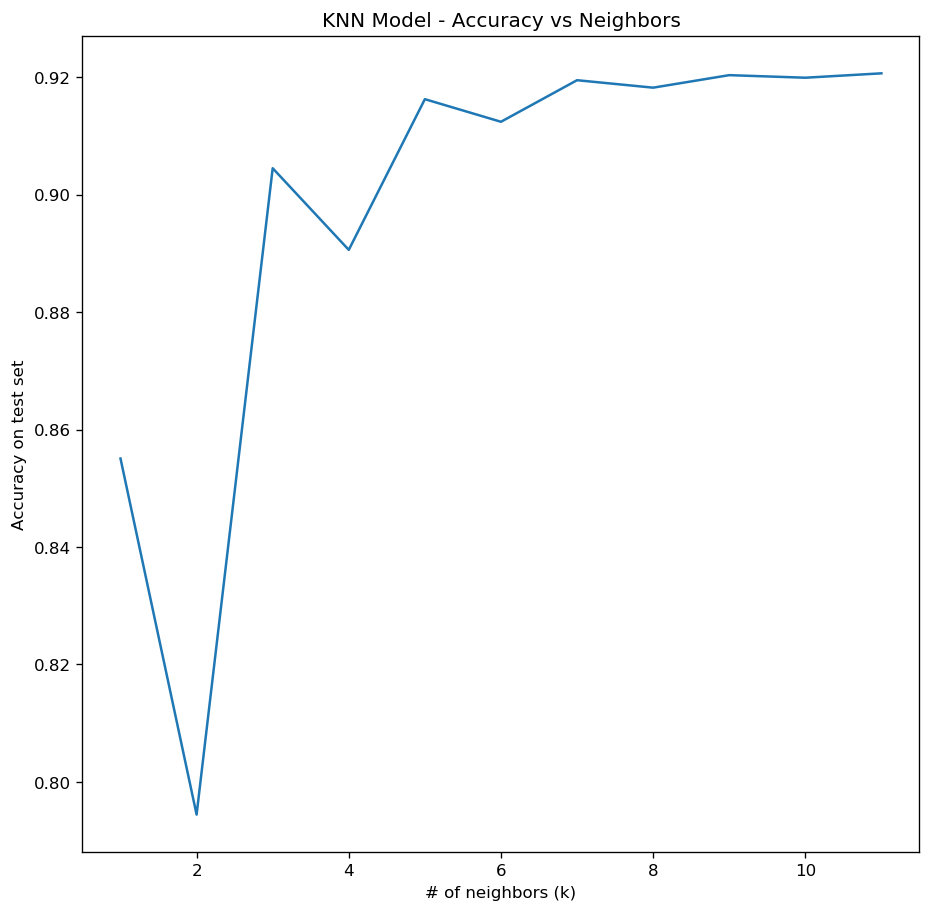

In [46]:
plt.figure(figsize=(9,9), dpi=120)
plt.plot(n_neighbors, knn_accuracy)
plt.xlabel('# of neighbors (k)')
plt.ylabel('Accuracy on test set')
plt.title('KNN Model - Accuracy vs Neighbors')


------------------ **Logistics Regression** ------------------

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix

In [41]:
#Hardcut Linear Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

logistic_prediction = log_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, logistic_prediction)

print("------------------------------")
print("Metrics on Test Data")
print (log_reg_accuracy)
print(confusion_matrix(y_test, logistic_prediction))
### You need to give it the cut-off

------------------------------
Metrics on Test Data
0.9207720753299973
[[     1  19388]
 [    23 225590]]


--------------------- **Support Vector**   ----------------------

The values of these where not that great. Will not consider SVM

In [ ]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm

In [ ]:
# 1. Create a suppor vector classifier model
model_svm = svm.SVC(kernel='linear')
# 2. Fit a model on the training data
model_svm.fit(X_train, y_train)
# 3a. Predict the values using the test data
y_pred = model_svm.predict(X_test)
# 3b. Score the model
accuracy_score(y_test,y_pred)
# take a look at the predictions
confusion_matrix(y_test,y_pred)

In [ ]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

In [ ]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)


y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

--------------- **DecisionTree** -------------------

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

pred = dt.predict(X_test)
confusion_matrix(y_test,pred)

array([[  5346,  14043],
       [    70, 225543]])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.99      0.28      0.43     19389
          1       0.94      1.00      0.97    225613

avg / total       0.95      0.94      0.93    245002



-------------- **Random Forest** ----------------

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

rf_predictions = rf.predict(X_test)

scores = cross_val_score(rf, X_test, y_test, cv=5)
print(scores)


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_predictions))

             precision    recall  f1-score   support

          0       1.00      0.26      0.41     19389
          1       0.94      1.00      0.97    225613

avg / total       0.94      0.94      0.92    245002



In [55]:
confusion_matrix(y_test, rf_predictions)

array([[  4997,  14392],
       [     5, 225608]])

# Dealing with Imbalanced Design

In [ ]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=160)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Oranges, annot=True, square=True, fmt='d',
           xticklabels=['Bad', 'Good'],
           yticklabels=['Bad', 'Good']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

### Experimenting with Class_Weight and C

In [28]:
lr_balanced = LogisticRegression(class_weight='balanced', C=5,random_state=44)

lr_balanced.fit(X_train, y_train)
print('Balanced class weights Logistic Regression Train F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_train, lr_balanced.predict(X_train)), roc_auc_score(y_train, lr_balanced.predict_proba(X_train)[:,1])))
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_balanced.predict(X_test)), roc_auc_score(y_test, lr_balanced.predict_proba(X_test)[:,1])))


Balanced class weights Logistic Regression Train F1: 0.858, Test AUC: 0.734
Balanced class weights Logistic Regression Test F1: 0.858, Test AUC: 0.738


In [29]:
print(confusion_matrix(y_test, lr_balanced.predict(X_test)))


[[ 10755   8634]
 [ 49739 175874]]


In [ ]:
lr_10x = LogisticRegression(class_weight={1 : 1, 0 : 10}, C=3, random_state=44)
lr_10x.fit(X_train, y_train)
print('Balanced class weights Logistic Regression Train F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_train, lr_10x.predict(X_train)), roc_auc_score(y_train, lr_10x.predict_proba(X_train)[:,1])))
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_10x.predict(X_test)), roc_auc_score(y_test, lr_10x.predict_proba(X_test)[:,1])))


In [ ]:
print(confusion_matrix(y_test, lr_10x.predict(X_test)))


*****
THIS IS ONE IS THE BEST ONE FROM THE NAIVE INPUTS.
*****

In [30]:
lr_9halfx = LogisticRegression(class_weight={1 : 1, 0 : 9.5}, C=3, random_state=44)
lr_9halfx.fit(X_train, y_train)
print('Balanced Class weights Logistic Regression Train F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_train, lr_9halfx.predict(X_train)), roc_auc_score(y_train, lr_9halfx.predict_proba(X_train)[:,1])))
print('Balanced Class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_9halfx.predict(X_test)), roc_auc_score(y_test, lr_9halfx.predict_proba(X_test)[:,1])))


Balanced Class weights Logistic Regression Train F1: 0.914, Test AUC: 0.728
Balanced Class weights Logistic Regression Test F1: 0.913, Test AUC: 0.732


In [32]:
from sklearn.metrics import precision_score, recall_score 
print(confusion_matrix(y_test, lr_9halfx.predict(X_test)))
print(accuracy_score(y_test, lr_9halfx.predict(X_test)))
print(precision_score(y_test, lr_9halfx.predict(X_test)))
print(recall_score(y_test, lr_9halfx.predict(X_test)))

[[  8276  11113]
 [ 26587 199026]]
0.8461237051126114
0.9471159565811201
0.882156613315722


In [33]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges): #plt.cm.Oranges
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = (100*cm.astype('float')) / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  8276  11113]
 [ 26587 199026]]
Normalized confusion matrix
[[42.68 57.32]
 [11.78 88.22]]


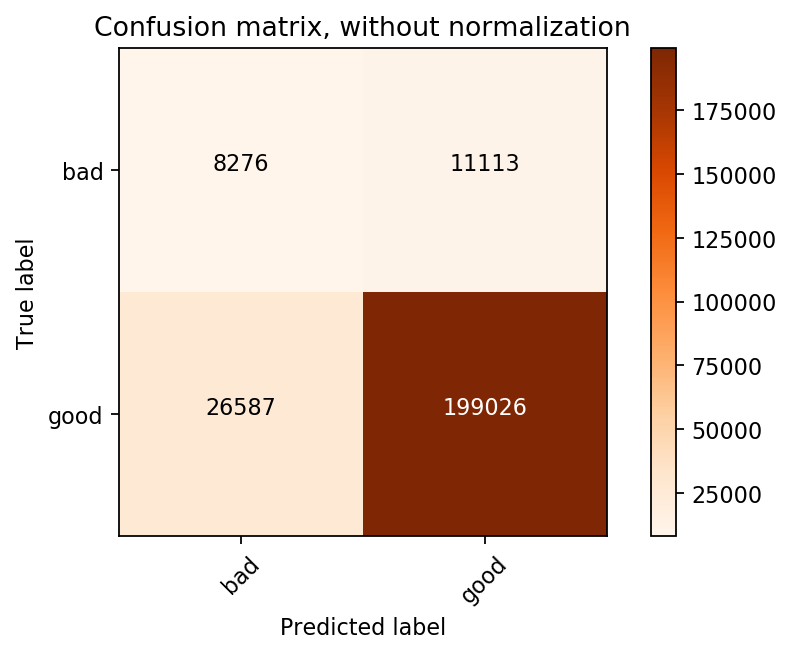

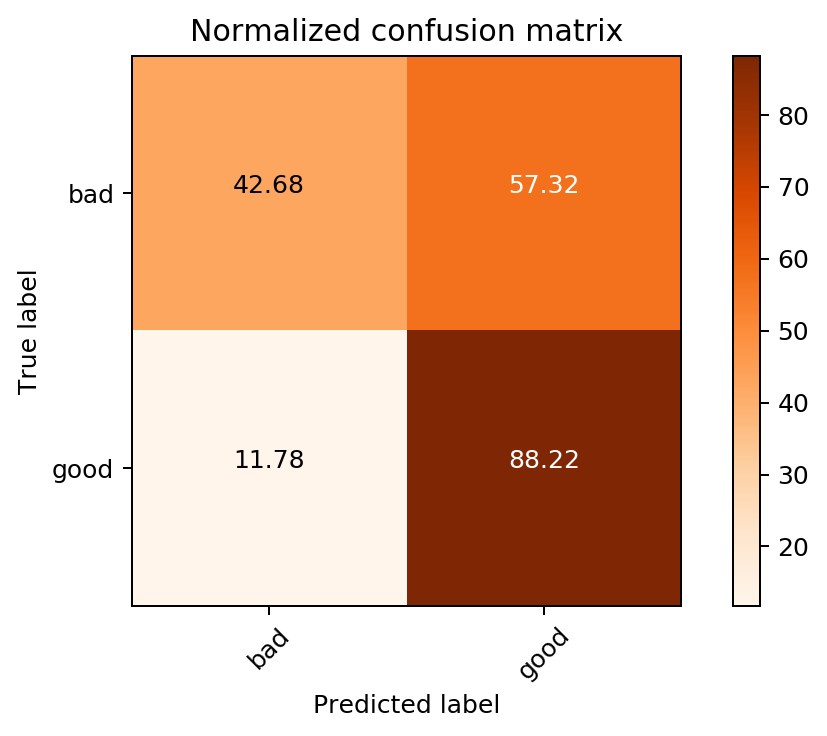

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, lr_9halfx.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(dpi=160)
plot_confusion_matrix(cnf_matrix, classes=['bad', 'good'], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(dpi=180)
plot_confusion_matrix(cnf_matrix, classes=['bad', 'good'], normalize=True, title='Normalized confusion matrix')

plt.show()

In [ ]:
import pickle
pickle.dump(lr_9halfx, open("logRegCredit2.p", "wb" ))

Logistic Regression Model best F1 score 0.969 at prob decision threshold >= 0.261


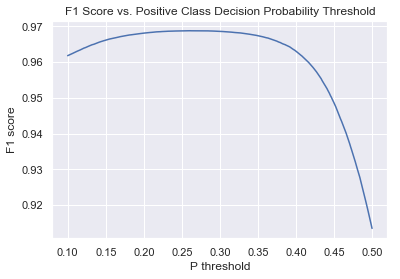

In [35]:
#FUNDING THE BEST PREDICT PROBABILITY TO MAXIMIZE F1
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = lr_9halfx.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores = []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(model_val_labels, y_val))
    
plt.plot(thresh_ps, f1_scores)
plt.title('F1 Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('F1 score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [36]:
prediction_soft = (lr_9halfx.predict_proba(X_test)[:, 1] >.261)
print(confusion_matrix(y_train, lr_9halfx.predict_proba(X_train)[:, 1] >.261))
print('Balanced class weights Logistic Regression Train F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_train, (lr_9halfx.predict_proba(X_train)[:, 1] >.261)), roc_auc_score(y_train, (lr_9halfx.predict_proba(X_train)[:, 1] >.261))))
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, prediction_soft), roc_auc_score(y_test, prediction_soft)))
print(confusion_matrix(y_test, prediction_soft))
print(accuracy_score(y_test, prediction_soft))
print(precision_score(y_test, prediction_soft))
print(recall_score(y_test, prediction_soft))

[[ 11487  33956]
 [   116 526112]]
Balanced class weights Logistic Regression Train F1: 0.969, Test AUC: 0.626
Balanced class weights Logistic Regression Test F1: 0.969, Test AUC: 0.626
[[  4896  14493]
 [    61 225552]]
0.940596403294667
0.9396238205336499
0.9997296255091683


### GridSearch

In [ ]:
LogisticRegression?

In [37]:
#Method for Stratification of Data with ratios being the same
import imblearn.under_sampling

RUS = imblearn.under_sampling.RandomUnderSampler(\
                                     ratio={ 0:int(64832/10) , 1:int(751841/10)}, \
                                     random_state = 44)

X_tr_RUS, y_tr_RUS = RUS.fit_sample(X,y)


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [53]:
from sklearn.model_selection import GridSearchCV

logitreg1 = LogisticRegression()
parameters = {'penalty':['l1','l2'] , 'C' : [3,3.5,4], 'class_weight': ['balanced', {1 : 1, 0 : 9}, {1 : 1, 0 : 9.5}], 'random_state': [44]}
grid1 = GridSearchCV(logitreg1 , parameters, cv=3, scoring='f1_weighted', n_jobs=1)
grid1.fit(X_tr_RUS, y_tr_RUS)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [3, 3.5, 4], 'class_weight': ['balanced', {1: 1, 0: 9}, {1: 1, 0: 9.5}], 'random_state': [44]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [41]:
grid1.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([463.43, 120.2 ,  75.23,  72.67, 329.15,  72.02, 438.87,  48.  ,
         93.5 ,  33.58, 135.49,  38.17, 156.57,  44.03,  96.29,  23.88,
         92.71,  31.85]),
 'std_fit_time': array([ 57.08,  55.27,   1.84,   9.87,  53.34,  12.82, 277.45,  15.76,
         17.74,   8.6 ,  62.1 ,   4.09,  23.42,   1.16,   3.67,   4.03,
         20.9 ,   2.76]),
 'mean_score_time': array([0.43, 0.4 , 0.14, 0.36, 0.41, 0.46, 0.35, 0.19, 0.19, 0.24, 0.17,
        0.21, 0.17, 0.12, 0.17, 0.15, 0.17, 0.14]),
 'std_score_time': array([0.18, 0.32, 0.02, 0.02, 0.05, 0.14, 0.12, 0.02, 0.03, 0.1 , 0.  ,
        0.06, 0.01, 0.  , 0.01, 0.04, 0.01, 0.  ]),
 'param_C': masked_array(data=[3, 3, 3, 3, 3, 3, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4, 4,
                    4, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
         

In [42]:
print(grid1.best_params_, grid1.best_score_)

{'C': 3, 'class_weight': {1: 1, 0: 9}, 'penalty': 'l1', 'random_state': 44} 0.8744853188410945


In [54]:
from sklearn.model_selection import GridSearchCV

logitreg2 = LogisticRegression()
parameters = {'penalty':['l1','l2'] , 'C' : [3,4], 'class_weight': [None, {1 : 1, 0 : 2}, {1 : 1, 0 : 9.5}], 'random_state': [44]}
grid2 = GridSearchCV(logitreg2 , parameters, cv=3, scoring='f1_macro', n_jobs=1)
grid2.fit(X_tr_RUS, y_tr_RUS)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [3, 4], 'class_weight': [None, {1: 1, 0: 2}, {1: 1, 0: 9.5}], 'random_state': [44]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

In [55]:
grid2.cv_results_


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([ 2.98,  0.98,  3.31,  0.97, 23.19,  2.96,  2.84,  0.99,  3.27,
         0.9 ,  6.07,  2.55]),
 'std_fit_time': array([ 0.7 ,  0.22,  1.26,  0.04, 21.97,  0.98,  0.48,  0.15,  1.41,
         0.15,  0.95,  0.35]),
 'mean_score_time': array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01]),
 'std_score_time': array([7.66e-04, 1.38e-04, 2.39e-04, 3.65e-05, 5.67e-05, 1.20e-04,
        9.37e-06, 2.51e-04, 6.24e-04, 8.72e-04, 5.50e-05, 5.33e-05]),
 'param_C': masked_array(data=[3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=[None, None, {1: 1, 0: 2}, {1: 1, 0: 2}, {1: 1, 0: 9.5},
                    {1: 1, 0: 9.5}, None, None, {1: 1, 0: 2}, {1: 1, 0: 2},
                    {1: 1, 0: 9.5}, {1: 1, 0: 9.5}],
              mask=[False,

In [56]:
print(grid2.best_params_, grid2.best_score_)

{'C': 3, 'class_weight': None, 'penalty': 'l1', 'random_state': 44} 0.6867379690012355


In [ ]:
from sklearn.model_selection import GridSearchCV

logitreg3 = LogisticRegression()
parameters = {'penalty':['l1','l2'] , 'C' : [3,3.5], 'class_weight': ['balanced', {1 : 1, 0 : 9}, {1 : 1, 0 : 9.5}, {1 : 1, 0 : 10}], 'random_state': [44]}
grid3 = GridSearchCV(logitreg3 , parameters, cv=3, scoring='f1', n_jobs=1)
grid3.fit(X_tr_RUS, y_tr_RUS)

In [ ]:
grid3.cv_results_

In [ ]:
print(grid3.best_params_, grid3.best_score_)

# END OF PROJECT

# (Post-Presentation)
Found out about this model and wanted to see where this goes.

Conclude from the first model, it did well. 

I would like to explore more by tunning hyperparameters through GridSearch

# XGBoost

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

xgb0 = XGBClassifier()
parameters = {'gamma':[3,4,5]}
grid0 = GridSearchCV(xgb0 , parameters, cv=3, scoring='f1_weighted', n_jobs=1)
grid0.fit(X_tr_RUS, y_tr_RUS)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=0)

In [46]:
grid0.cv_results_
print(grid0.best_params_, grid0.best_score_)

{'gamma': 4} 0.9240937140419158


In [47]:
# #Non-Hyper
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(X_test)
                            
print(xgb.score(X_test, y_test))
scores = cross_val_score(xgb, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9412861935820932


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

[0.94 0.94 0.94 0.94 0.94]
Accuracy: 0.94 (+/- 0.00)



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, xgb_predictions))
print(confusion_matrix(y_test, xgb_predictions))

             precision    recall  f1-score   support

          0       1.00      0.26      0.41     19389
          1       0.94      1.00      0.97    225613

avg / total       0.94      0.94      0.92    245002

[[  5010  14379]
 [     6 225607]]


In [49]:
#Hyper!
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgbT = XGBClassifier(gamma=4)
xgbT.fit(X_train, y_train)

xgbT_predictions = xgbT.predict(X_test)
                            
print(xgbT.score(X_test, y_test))
scores = cross_val_score(xgbT, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9412861935820932


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

[0.94 0.94 0.94 0.94 0.94]
Accuracy: 0.94 (+/- 0.00)



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [50]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, xgbT_predictions))
print(confusion_matrix(y_test, xgbT_predictions))

             precision    recall  f1-score   support

          0       1.00      0.26      0.41     19389
          1       0.94      1.00      0.97    225613

avg / total       0.94      0.94      0.92    245002

[[  5009  14380]
 [     5 225608]]


After this, I included other initial models that isn't part of the finalized production

## Oversampling - FROM THE 9.5X for Good Loans

In [ ]:
#Method for Stratification of Data with ratios being the same
import imblearn.over_sampling

OVS = imblearn.over_sampling.RandomOverSampler(\
                                     ratio={ 0:int(64832/10) , 1:int(751841/10)}, \
                                     random_state = 44)

X_tr_OVS, y_tr_OVS = OVS.fit_sample(X,y)


### A.) Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
     (f1_score(y_test,lr.predict(X_test)), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))
#print (accuracy_score(y_test, (lr.predict_proba(X_test)[:,1]))) #
#print (confusion_matrix(y_test, (lr.predict_proba(X_test)[:,1])))#


In [ ]:
confusion_matrix(y_test, lr.predict(X_test))

In [ ]:
lr_os = LogisticRegression()
lr_os.fit(X_tr_rs, y_tr_rs)
print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
     (f1_score(y_test, lr_os.predict(X_test)), roc_auc_score(y_test, lr_os.predict_proba(X_test)[:,1])))
#print (accuracy_score(y_test, lr_os.predict_proba(X_test)[:,1])) #

#print(confusion_matrix(y_test, logistic_prediction))
#logistic_prediction = log_model.predict(X_test)

In [ ]:
confusion_matrix(y_test, lr_os.predict(X_test))

#### Hypertuning for Logistic Regression in Oversampling

In [ ]:
lr_os50 = LogisticRegression(C = 50)
lr_os50.fit(X_tr_rs, y_tr_rs)
print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
     (f1_score(y_test, lr_os50.predict(X_test)), roc_auc_score(y_test, lr_os50.predict_proba(X_test)[:,1])))

In [ ]:
confusion_matrix(y_test, lr_os50.predict(X_test))

In [ ]:
lr_os80 = LogisticRegression(C = 80)
lr_os80.fit(X_tr_rs, y_tr_rs)
print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
     (f1_score(y_test, lr_os80.predict(X_test)), roc_auc_score(y_test, lr_os80.predict_proba(X_test)[:,1])))

In [ ]:
confusion_matrix(y_test, lr_os80.predict(X_test))

In [ ]:
make_confusion_matrix(lr_os80) #.5

### B.) KNeighboors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_tr_rs, y_tr_rs)


print("Metrics on Training Data")
train_predict = knn.predict(X_tr_rs)
print(metrics.accuracy_score(y_tr_rs, train_predict))
print(confusion_matrix(y_tr_rs, train_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
n_neighbors = range(1,12)
knn_accuracy = list()

for n in n_neighbors:
    knn = KNeighborsClassifier(n)
    knn.fit(X_tr_rs, y_tr_rs)
    knn_prediction = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, knn_prediction))

In [ ]:
plt.figure(figsize=(9,9), dpi=120)
plt.plot(n_neighbors, knn_accuracy)
plt.xlabel('# of neighbors (k)')
plt.ylabel('Accuracy on test set')
plt.title('KNN Model - Accuracy vs Neighbors')


## SMOTE - 11X for Good Loans

In [ ]:
smote = imblearn.over_sampling.SMOTE(\
                                     ratio={0:45443*11,1:526228}, \
                                              random_state=42)
    
X_tr_smote, y_tr_smote = smote.fit_sample(X_train, y_train)


#### Logistic Regression

In [ ]:
lr_smote = LogisticRegression() 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_smote.predict(X_test)), roc_auc_score(y_test, lr_smote.predict_proba(X_test)[:,1])))


In [ ]:
lr_smote50 = LogisticRegression(C=50) 
lr_smote50.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_smote50.predict(X_test)), roc_auc_score(y_test, lr_smote50.predict_proba(X_test)[:,1])))


In [ ]:
lr_smote75 = LogisticRegression(C=75) 
lr_smote75.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_train, lr_smote75.predict(X_train)), roc_auc_score(y_train, lr_smote75.predict_proba(X_train)[:,1])))
print('Logistic Regression on SMOTE Test Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_smote75.predict(X_test)), roc_auc_score(y_test, lr_smote75.predict_proba(X_test)[:,1])))


In [ ]:
make_confusion_matrix(lr_smote75) #.5

#### SVM 

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=6, random_state=44, kind = 'svm')
X_res_train, y_res_train = sm.fit_sample(X_tr_smote, y_tr_smote)

In [ ]:
svm_sm_clf = SVC()
svm_sm_clf.fit(X_res_train, y_res_train)

svm_sm_predictions = svm_clf.predict(X_test)

#print(svm_sm_clf.score(X_test_R, y_test))
scores = cross_val_score(svm_sm_clf, X_test, y_test, cv=5)
print(scores)
#print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(sklearn.metrics.classification_report(y_test, svm_sm_predictions))
print(sklearn.metrics.confusion_matrix(y_test, svm_sm_predictions))